<a href="https://colab.research.google.com/github/suzusuzu/higher_order_svd/blob/master/higher_order_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

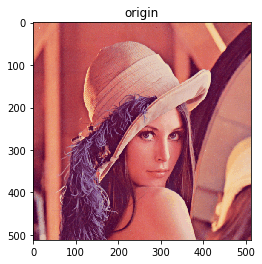

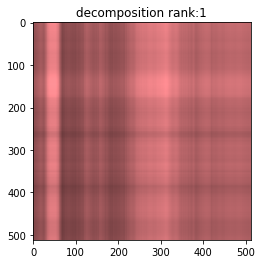

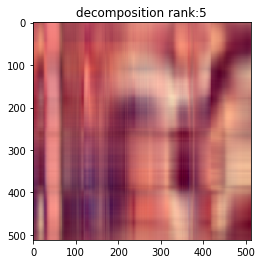

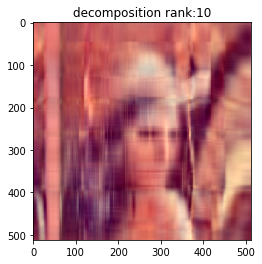

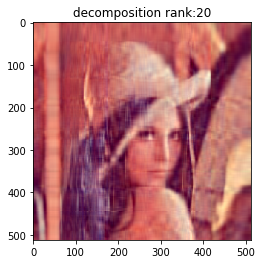

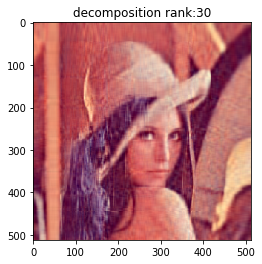

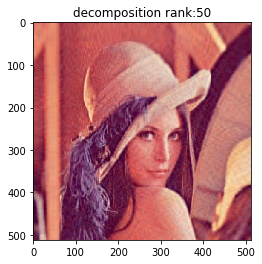

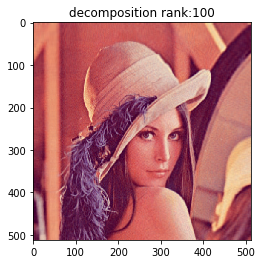

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
import numpy as np
import io
from scipy import linalg

def decom(rank, img):
    X = np.asarray(img)
    h, w, _ = X.shape
    X1 =  X.transpose(0,1,2).reshape(h,3*w)
    X2 = X.transpose(1,2,0).reshape(w,3*h)
    U1,_ ,_  = linalg.svd(X1)
    U2,_ ,_ = linalg.svd(X2)
    u1 = U1[:, :rank]
    u2 = U2[:, :rank]
    pu1 = u1.dot(u1.T)
    pu2 = u2.dot(u2.T)
    X = np.tensordot(pu1,X,(0,0))
    X = np.tensordot(pu2,X,(0,1))
    X = X.transpose(1, 0, 2)
    plt.imshow(np.uint8(np.clip(X, 0, 255)))
    plt.title('decomposition rank:' + str(rank))
    plt.show()

url = 'https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_color.gif'

img = Image.open(io.BytesIO(requests.get(url).content)).convert("RGB")
plt.imshow(img)
plt.title('origin')
plt.show()

for r in [1, 5, 10, 20, 30, 50, 100]:
    decom(r, img)